In [2]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = 'Documents/Anexo 2 - Dataset Vehicle/CAR DETAILS FROM CAR DEKHO.csv'
data = pd.read_csv(file_path)

In [11]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
data_info, data_head

(None,
                        name  year  selling_price  km_driven    fuel  \
 0             Maruti 800 AC  2007          60000      70000  Petrol   
 1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
 2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
 3    Datsun RediGO T Option  2017         250000      46000  Petrol   
 4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
 
   seller_type transmission         owner  
 0  Individual       Manual   First Owner  
 1  Individual       Manual   First Owner  
 2  Individual       Manual   First Owner  
 3  Individual       Manual   First Owner  
 4  Individual       Manual  Second Owner  )

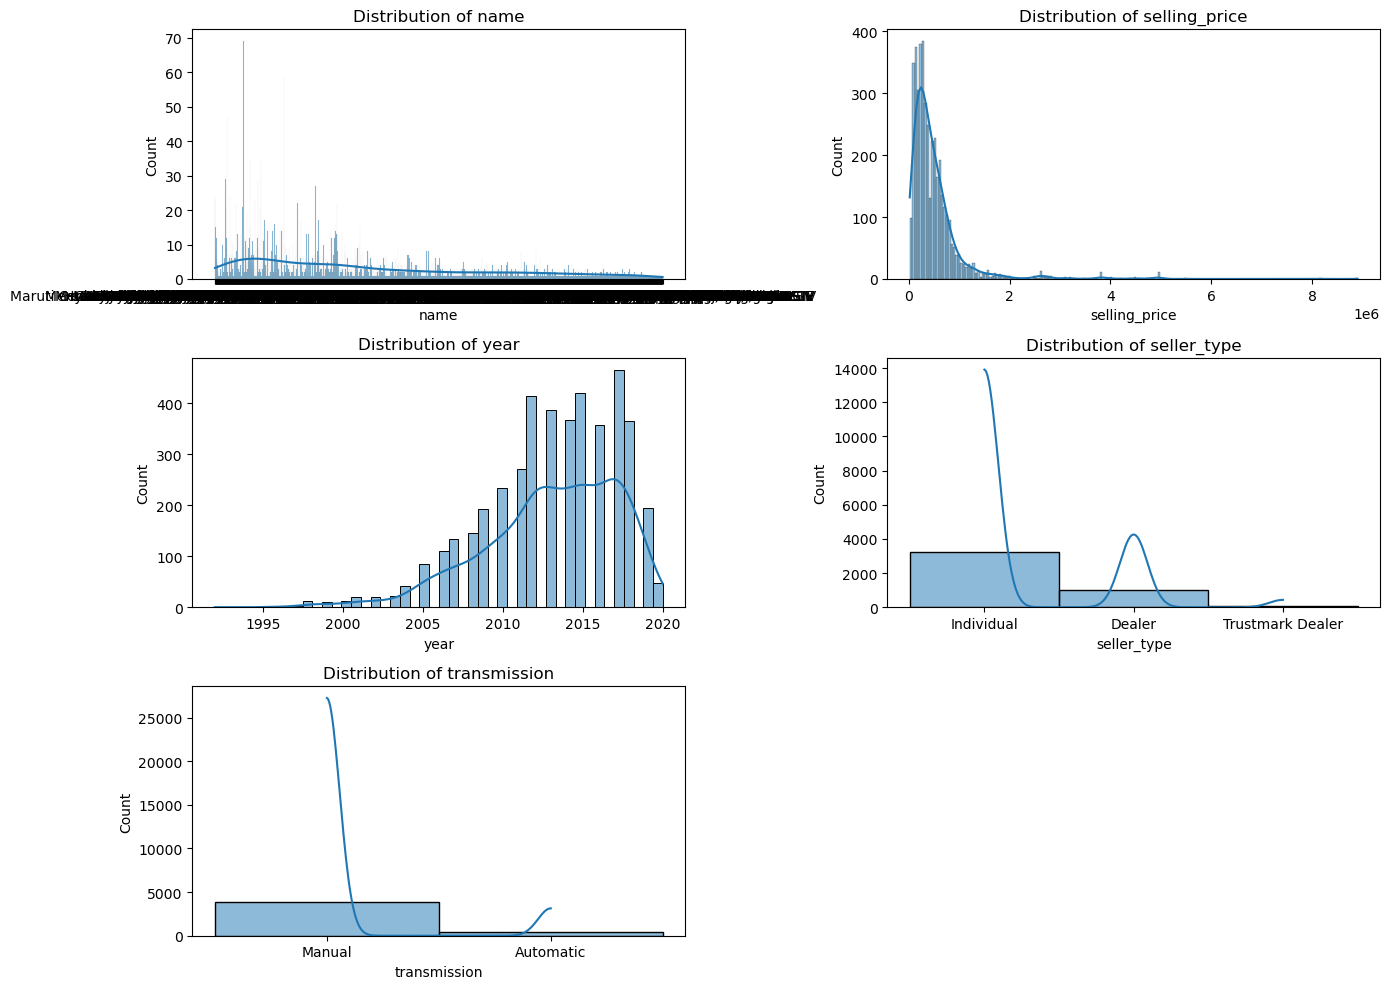

In [32]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['name',  'selling_price', 'year','seller_type','transmission'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [36]:
sns.set(style="whitegrid")


C:\Users\Mauro\AppData\Local\Temp\ipykernel_9132\559426557.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='selling_price', marker='o', ci=None)


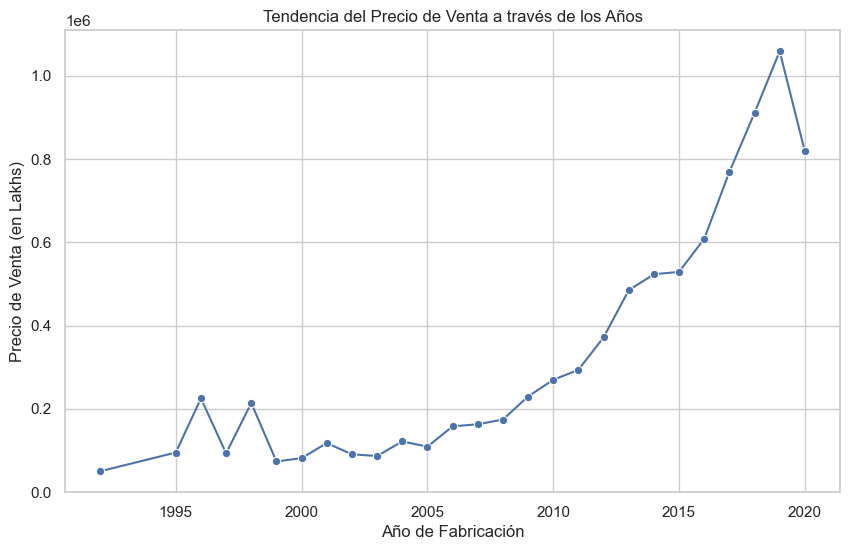

In [40]:
# Tendencia en el Precio de Venta a través de los Años
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='selling_price', marker='o', ci=None)
plt.title('Tendencia del Precio de Venta a través de los Años')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_9132\1207862183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=data, palette='pastel')


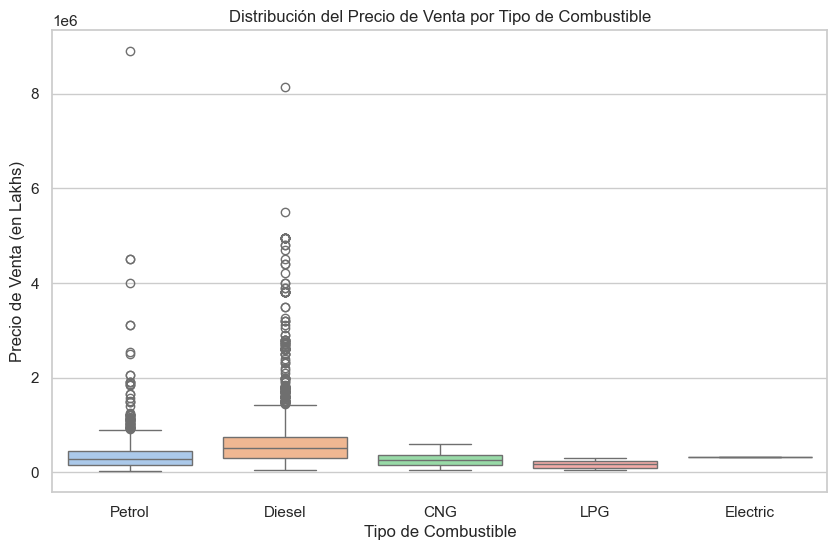

In [42]:
# Tendencia en el Precio de Venta según el Tipo de Combustible
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=data, palette='pastel')
plt.title('Distribución del Precio de Venta por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta (en Lakhs)')
plt.show()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_9132\1966536773.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)


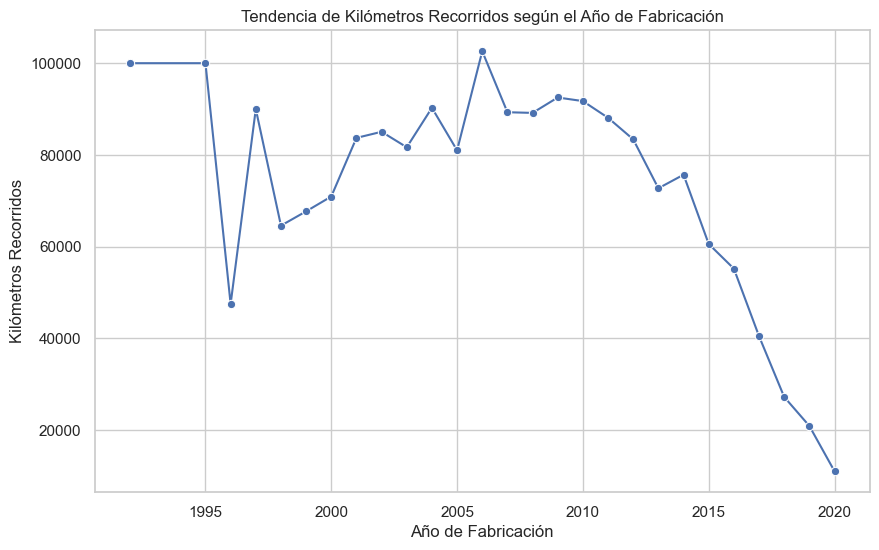

In [44]:
# Análisis del Kilometraje según el Año
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='km_driven', marker='o', ci=None)
plt.title('Tendencia de Kilómetros Recorridos según el Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Kilómetros Recorridos')
plt.show()


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

In [51]:
data = data.copy()  # Crear copia para evitar modificar datos originales
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [54]:
X = data.drop('selling_price', axis=1)  # Aquí asumimos 'Selling_Price' como la variable objetivo
y = data['selling_price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
correlation_matrix = data.corr()
print("Correlación con 'selling_price':\n", correlation_matrix['selling_price'].sort_values(ascending=False))

Correlación con 'selling_price':
 selling_price    1.000000
year             0.413922
name            -0.077598
seller_type     -0.151554
km_driven       -0.192289
owner           -0.207840
fuel            -0.269653
transmission    -0.530205
Name: selling_price, dtype: float64


In [63]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (3038, 7)
Tamaño del conjunto de prueba: (1302, 7)
